# 1 数据处理

In [1]:
# ===============(1)导入库================
# 导入基础数据处理库
import numpy as np  # 科学计算库，用于数组和矩阵运算
import pandas as pd # 数据处理库，用于数据读取和预处理

# 导入可视化库
import matplotlib.pyplot as plt  # 基础绘图库
import matplotlib.gridspec as gridspec # 子图布局工具
import seaborn as sns  # 高级可视化库，提供美观的图表样式

# 数据处理——代码实例
# 导入机器学习常用分类模型
from sklearn.ensemble import RandomForestClassifier# 随机森林
from sklearn.linear_model import LogisticRegression# 逻辑回归
from sklearn.naive_bayes import GaussianNB# 高斯朴素贝叶斯
from sklearn.neighbors import KNeighborsClassifier# K近邻算法
from sklearn.svm import SVC# 支持向量机

# 导入机器学习相关模块
from sklearn.metrics import ( # 模型评估指标
    accuracy_score,# 准确率
    classification_report,# 综合分类报告
    confusion_matrix,# 混淆矩阵
    f1_score, # F1分数
    precision_score,# 精确度
    recall_score,# 召回率
)
from sklearn.model_selection import train_test_split  # 数据集划分工具
from sklearn.preprocessing import LabelEncoder, StandardScaler  # 数据预处理工具

In [2]:
# =========================数据处理——代码实例（2）数据加载与预处理=========================
data = pd.read_csv("./lung_cancer.csv")#导入数据集，默认数据与程序在同一路径下
data.isna().sum()                   # 检查数据集中是否存在缺失值
print("去重前",data.shape)
data.drop_duplicates(inplace=True)   # 检查并处理重复数据
print("去重后",data.shape)

# 将性别编码从M/F转换为Male/Female
data["GENDER"] = data["GENDER"].replace({"M": "Male", "F": "Female"})
data

去重前 (309, 16)
去重后 (276, 16)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,Male,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,Female,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,Male,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,Female,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Female,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
280,Female,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
281,Male,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
282,Male,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


In [3]:
encoded_data = data.copy()          # 创建数据副本并进行预处理
for col in encoded_data.columns:    # 将数值编码(1和2)转换为Yes/No
    encoded_data[col] = encoded_data[col].replace({2: "Yes", 1: "No"})
encoded_data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
2,Female,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,NO
3,Male,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,NO
4,Female,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Female,59,No,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,No,Yes,No,YES
280,Female,59,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,No,No,NO
281,Male,55,Yes,No,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,NO
282,Male,46,No,Yes,Yes,No,No,No,No,No,No,No,No,Yes,Yes,NO


# 2 可视化分析

In [4]:
# ===============（1）数据筛选可视化================
sns.set_style("whitegrid")  # 图表风格为白色网格即白色背景+灰色网格线，适合科学图表
sns.set_context("poster", font_scale=0.7) # 配置图表为海报模式，但字体缩放为0.7倍
data_pos = encoded_data[encoded_data["LUNG_CANCER"] == "YES"] # 筛选肺癌阳性病例
# 注意这里 YES 和 NO 字符全大写！！！！
data_pos.head() # 展示筛选后的数据前5行

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
5,Female,75,No,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,YES
6,Male,52,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,YES
7,Female,51,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,No,YES


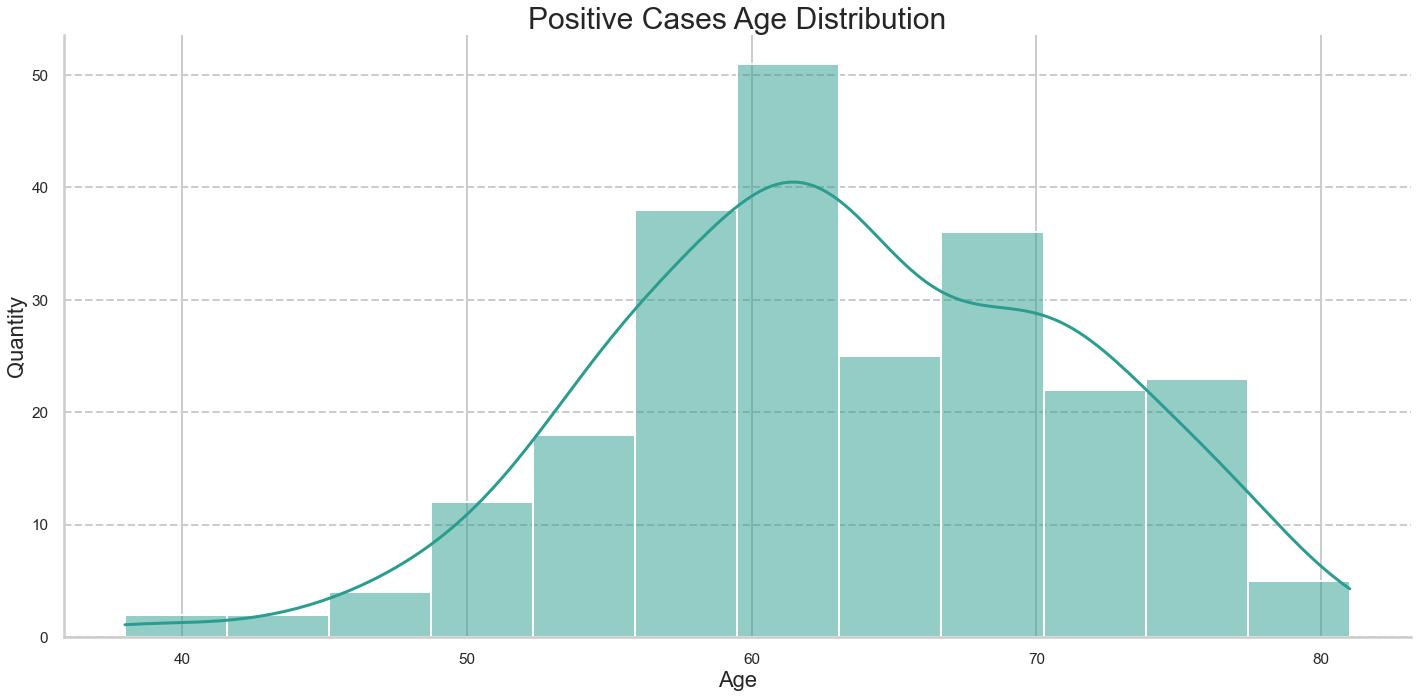

In [45]:
# ===============（3）创建肺癌患者年龄分布直方图================
plt.figure(figsize=(20, 10)) # 设置画布尺寸：20英寸宽×10英寸高

# 绘制蓝绿色的年龄分布直方图并添加核密度估计曲线
sns.histplot(data=data_pos["AGE"], color="#2a9d8f", kde=True)

plt.title("Positive Cases Age Distribution", fontsize=30) # 设置主标题
plt.xlabel("Age", fontsize=22) # 设置X轴标签为"Age"（年龄）
plt.ylabel("Quantity", fontsize=22) # 设置Y轴标签为"Quantity"（数量/病例数）
plt.grid(axis='y', linestyle='--') # 仅添加Y轴方向的网格线（虚线样式）
sns.despine() # 移除顶部和右侧坐标轴线
plt.tight_layout() # 自动调整子图/标签间距
plt.show() # 渲染并显示最终图形

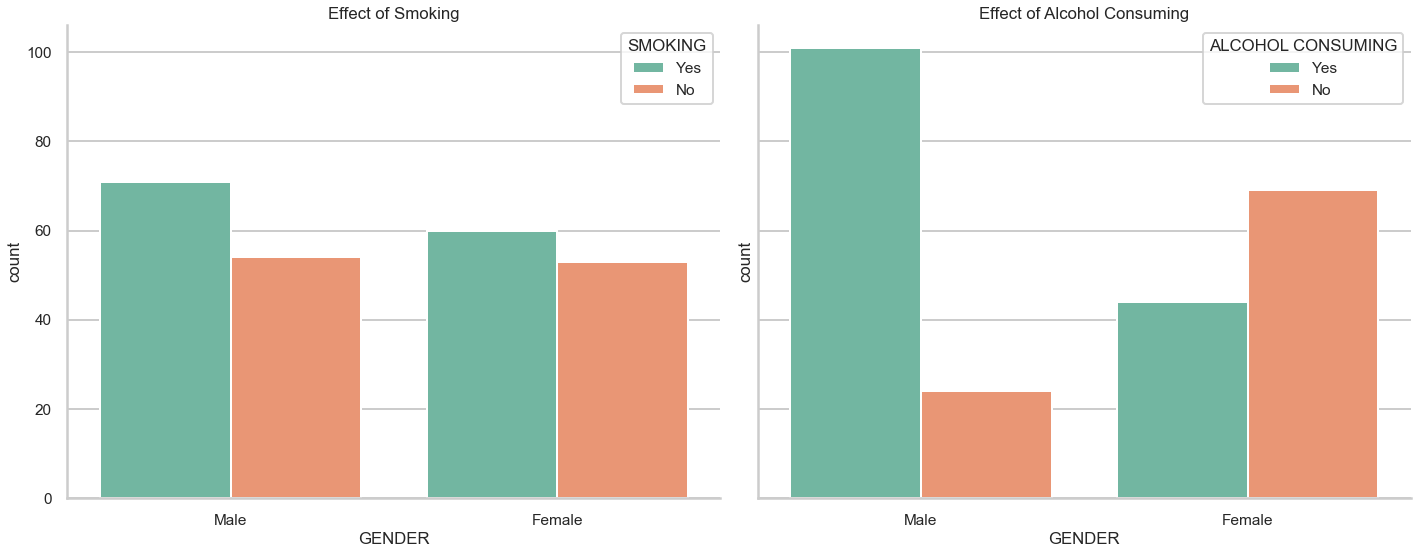

In [6]:
# ===============（2）创建两个子图，分析吸烟和饮酒对肺癌的影响================
fig, axs = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# 分析不同性别的吸烟与肺癌的关系
sns.countplot(data=data_pos, x="GENDER", hue="SMOKING", hue_order=["Yes", "No"], ax=axs[0], palette="Set2")
axs[0].set_title("Effect of Smoking") # 设置子图主标题

# 分析不同性别的饮酒与肺癌的关系
sns.countplot(data=data_pos, x="GENDER", hue="ALCOHOL CONSUMING", hue_order=["Yes", "No"], ax=axs[1], palette="Set2")
axs[1].set_title("Effect of Alcohol Consuming") # 设置子图主标题

sns.despine() # 移除顶部和右侧坐标轴线
plt.tight_layout() # 自动调整子图/标签间距
plt.show() # 渲染并显示最终图形


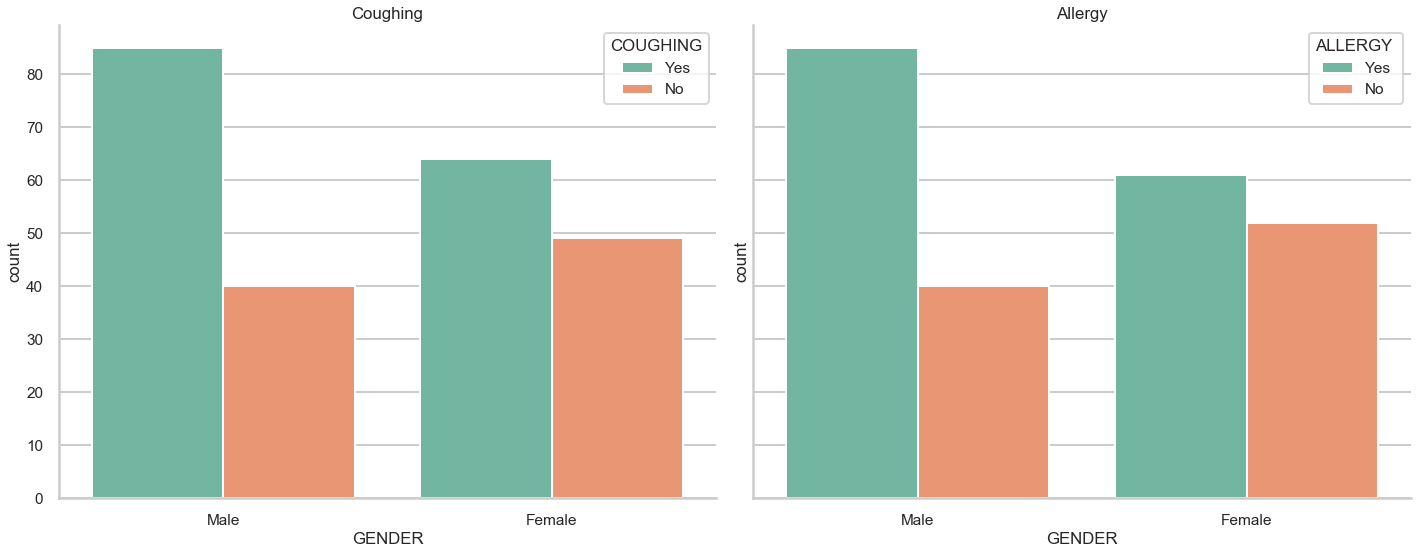

In [7]:
# ===============（3）创建两个子图，分析咳嗽和过敏与肺癌的关系================
fig, axs = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# 分析咳嗽与肺癌的关系
sns.countplot(data=data_pos, x="GENDER", hue="COUGHING", hue_order=["Yes", "No"], ax=axs[0], palette="Set2")
axs[0].set_title("Coughing")

# 分析过敏与肺癌的关系
sns.countplot(data=data_pos, x="GENDER", hue="ALLERGY ", hue_order=["Yes", "No"], ax=axs[1], palette="Set2")
axs[1].set_title("Allergy")

sns.despine()
plt.tight_layout()
plt.show()

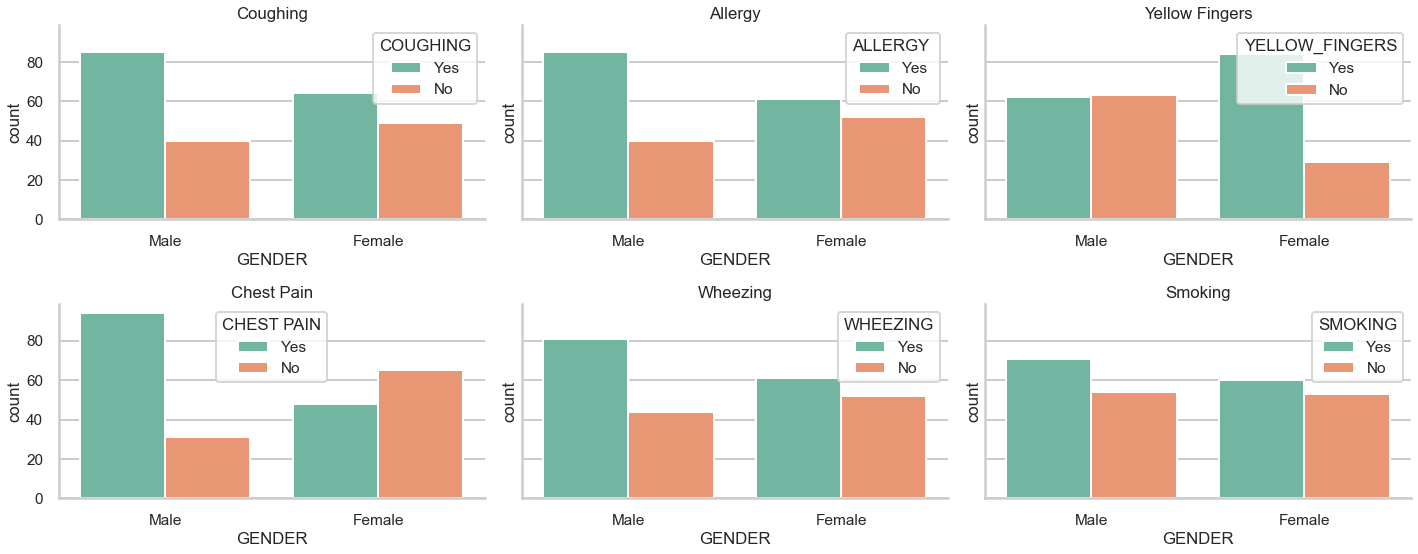

In [8]:
# ===============（4）创建六个子图，分析六种症状和风险因素与肺癌的关系================
fig, axs = plt.subplots(2, 3, figsize=(20, 8), sharey=True)

# 分析咳嗽与肺癌的关系
sns.countplot(data=data_pos, x="GENDER", hue="COUGHING", hue_order=["Yes", "No"], ax=axs[0,0], palette="Set2")
axs[0,0].set_title("Coughing")

# 分析过敏与肺癌的关系
sns.countplot(data=data_pos, x="GENDER", hue="ALLERGY ", hue_order=["Yes", "No"], ax=axs[0,1], palette="Set2")
axs[0,1].set_title("Allergy")

# 分析黄指与肺癌的关系
sns.countplot(data=data_pos, x="GENDER", hue="YELLOW_FINGERS", hue_order=["Yes", "No"], ax=axs[0,2], palette="Set2")
axs[0,2].set_title("Yellow Fingers")

# 分析胸痛与肺癌的关系
sns.countplot(data=data_pos, x="GENDER", hue="CHEST PAIN", hue_order=["Yes", "No"], ax=axs[1,0], palette="Set2")
axs[1,0].set_title("Chest Pain")

# 分析喘息与肺癌的关系
sns.countplot(data=data_pos, x="GENDER", hue="WHEEZING", hue_order=["Yes", "No"], ax=axs[1,1], palette="Set2")
axs[1,1].set_title("Wheezing")

# 分析吸烟与肺癌的关系
sns.countplot(data=data_pos, x="GENDER", hue="SMOKING", hue_order=["Yes", "No"], ax=axs[1,2], palette="Set2")
axs[1,2].set_title("Smoking")

sns.despine()
plt.tight_layout()
plt.show()

# 3 特征工程
特征工程：从原始数据中提取、选择、转换特征的过程，通过清洗、归一化降维等方法优化数据，提升模型性能，是机器学习中连接数据与算法的核心环节。数据特征直接决定模型的上限，优质特征可使简单模型达到优异效果，同时降低模型复杂度、加速训练过程。

- 变量编码与重命名 </br>
比如：YES：1；NO：0
- 分离特征和目标变量 </br>
提取或删除
- 标准化处理(归一化) </br>
- 划分训练集和测试集 </br>
    - 训练集:用于模型参数学习和拟合，帮助确定模型的数学表达式或决策规则。
    - 测试集:用于评估模型对新样本的预测能力(泛化能力)，其误差作为泛化误差的近似。

In [9]:
# 3、特征工程
# ===============特征工程================
data["LUNG_CANCER"] = LabelEncoder().fit_transform(data["LUNG_CANCER"]) # 目标变量编码
data = pd.get_dummies(data, columns=["GENDER"]) # 将分类变量转换为独热编码
data.rename(columns={
    "GENDER_Male": "MALE", "GENDER_Female": "FEMALE",
    "YELLOW_FINGERS": "YELLOW_FINGERS", "PEER_PRESSURE": "PEER_PRESSURE",
    "FATIGUE": "FATIGUE", "ALLERGY_": "ALLERGY",
    "LUNG_CANCER": "LUNG_CANCER" # 末尾有个空格
}, inplace=True) # 重命名列名，使其更具可读性

X = data.drop("LUNG_CANCER", axis=1) # 分离特征变量
y = data["LUNG_CANCER"] # 分离目标变量

# 先拆分数据集，再标准化
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # 用训练集拟合并转换
X_test = scaler.transform(X_test) # 用训练集的参数转换测试集

# 4 模型训练与评估

K临近估计

In [10]:
# 4、模型训练与评估
# ===============（1）构建和评估K近邻模型================
# 构建和评估K近邻模型
from sklearn.neighbors import KNeighborsClassifier

# 初始化KNN模型，设置邻居数量
knn = KNeighborsClassifier(n_neighbors=2)

# 训练模型并进行预测
knn.fit(X_train, y_train) # 训练模型
knn_pred = knn.predict(X_test) # 进行预测

# 评估K近邻模型
knn_conf = confusion_matrix(y_test, knn_pred) # 计算混淆矩阵
knn_report = classification_report(y_test, knn_pred) # 生成分类报告
knn_acc = round(accuracy_score(y_test, knn_pred)*100, ndigits=2) # 计算准确率

# 输出结果
print(f"Confusion Matrix : \n\n{knn_conf}")
print(f"\nClassification Report : \n\n{knn_report}")
print(f"\nThe Accuracy of K Nearest Neighbors Classifier is {knn_acc} %")

Confusion Matrix : 

[[12  0]
 [ 2 42]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.95      0.98        44

    accuracy                           0.96        56
   macro avg       0.93      0.98      0.95        56
weighted avg       0.97      0.96      0.97        56


The Accuracy of K Nearest Neighbors Classifier is 96.43 %


朴素贝叶斯

In [11]:
# ===============（2）构建和评估高斯朴素贝叶斯模型================
from sklearn.naive_bayes import GaussianNB
# 初始化高斯朴素贝叶斯模型
gnb = GaussianNB()

gnb.fit(X_train, y_train) # 训练模型
gnb_pred = gnb.predict(X_test) # 进行预测

gnb_conf = confusion_matrix(y_test, gnb_pred) # 计算混淆矩阵
gnb_report = classification_report(y_test, gnb_pred) # 生成分类报告
gnb_acc = round(accuracy_score(y_test, gnb_pred)*100, ndigits=2) # 计算准确率

# 输出结果
print(f"\nConfusion Matrix : \n\n{gnb_conf}")
print(f"\nClassification Report : \n\n{gnb_report}")
print(f"\nThe Accuracy of Gaussian Naive Bayes is {gnb_acc} %")


Confusion Matrix : 

[[ 8  4]
 [ 1 43]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.91      0.98      0.95        44

    accuracy                           0.91        56
   macro avg       0.90      0.82      0.85        56
weighted avg       0.91      0.91      0.91        56


The Accuracy of Gaussian Naive Bayes is 91.07 %


In [12]:
# ===============（3）五个模型训练与评估================
# 创建字典models，键为模型名称，值为对应的Scikit-learn分类器实例，包括K近邻、高斯朴素贝叶斯、逻辑回归、随机森林和支持向量机。
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=2),
    "Gaussian Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(C=100, gamma=0.002, probability=True),
}

metrics = [] # 初始化空列表，用于存储每个模型的性能指标（如准确率、精确率等）
results = {} # 初始化空字典，用于存储每个模型的详细结果（如模型对象、混淆矩阵等）

for name, model in models.items(): # 遍历 models 字典，对每个模型执行以下操作：
    model.fit(X_train, y_train) # 训练模型
    pred = model.predict(X_test) # 在测试集上进行预测
    acc = round(accuracy_score(y_test, pred)*100, 2) # 计算准确率，保留两位小数
    results[name] = {
        "model": model,
        "conf": confusion_matrix(y_test, pred), # 保存混淆矩阵（confusion_matrix）
        "report": classification_report(y_test, pred), # 分类报告（classification_report）
        "pred": pred, # 预测结果
        "acc": acc, # 准确率（accuracy）
        "precision": round(precision_score(y_test, pred)*100,2),
        "recall": round(recall_score(y_test, pred)*100,2),
        "f1": round(f1_score(y_test, pred)*100,2)
    
    }
    metrics.append([name, acc, results[name]["precision"], results[name]["recall"], results[name]["f1"]])
results

{'K-Nearest Neighbors': {'model': KNeighborsClassifier(n_neighbors=2),
  'conf': array([[12,  0],
         [ 2, 42]], dtype=int64),
  'report': '              precision    recall  f1-score   support\n\n           0       0.86      1.00      0.92        12\n           1       1.00      0.95      0.98        44\n\n    accuracy                           0.96        56\n   macro avg       0.93      0.98      0.95        56\nweighted avg       0.97      0.96      0.97        56\n',
  'pred': array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
         0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
         1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1]),
  'acc': 96.43,
  'precision': 100.0,
  'recall': 95.45,
  'f1': 97.67},
 'Gaussian Naive Bayes': {'model': GaussianNB(),
  'conf': array([[ 8,  4],
         [ 1, 43]], dtype=int64),
  'report': '              precision    recall  f1-score   support\n\n           0       0.89      0.67      0.76        12\n     

# 5 性能指标可视化

模型性能对比表格

In [18]:
# 5、模型性能对比
# ===============（1）模型性能对比表格================
# 将metrics列表转换为Pandas DataFrame，指定列名为 "Model", "Accuracy", "Precision", "Recall", "F1 Score", 并存储为 metric_df
metric_df = pd.DataFrame(metrics, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
metric_df.sort_values("Accuracy", ascending=False, inplace=True) # 按准确率降序排序
print(f"\n\n{metric_df}")



                    Model  Accuracy  Precision  Recall  F1 Score
0     K-Nearest Neighbors     96.43     100.00   95.45     97.67
4  Support Vector Machine     94.64      93.62  100.00     96.70
2     Logistic Regression     92.86      91.67  100.00     95.65
1    Gaussian Naive Bayes     91.07      91.49   97.73     94.51
3           Random Forest     89.29      88.00  100.00     93.62


In [19]:
metric_df

,Model,Accuracy,Precision,Recall,F1 Score
0,K-Nearest Neighbors,96.43,100.00,95.45,97.67
4,Support Vector Machine,94.64,93.62,100.00,96.70
2,Logistic Regression,92.86,91.67,100.00,95.65
1,Gaussian Naive Bayes,91.07,91.49,97.73,94.51
3,Random Forest,89.29,88.00,100.00,93.62


混淆矩阵

In [42]:
for (i,j) in results.items():
    print(i)
    print(j)
    

K-Nearest Neighbors
{'model': KNeighborsClassifier(n_neighbors=2), 'conf': array([[12,  0],
       [ 2, 42]], dtype=int64), 'report': '              precision    recall  f1-score   support\n\n           0       0.86      1.00      0.92        12\n           1       1.00      0.95      0.98        44\n\n    accuracy                           0.96        56\n   macro avg       0.93      0.98      0.95        56\nweighted avg       0.97      0.96      0.97        56\n', 'pred': array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1]), 'acc': 96.43, 'precision': 100.0, 'recall': 95.45, 'f1': 97.67}
Gaussian Naive Bayes
{'model': GaussianNB(), 'conf': array([[ 8,  4],
       [ 1, 43]], dtype=int64), 'report': '              precision    recall  f1-score   support\n\n           0       0.89      0.67      0.76        12\n           1       0.91      0.98      0

===i:=== 0 ===name:=== K-Nearest Neighbors ===result:=== {'model': KNeighborsClassifier(n_neighbors=2), 'conf': array([[12,  0],
       [ 2, 42]], dtype=int64), 'report': '              precision    recall  f1-score   support\n\n           0       0.86      1.00      0.92        12\n           1       1.00      0.95      0.98        44\n\n    accuracy                           0.96        56\n   macro avg       0.93      0.98      0.95        56\nweighted avg       0.97      0.96      0.97        56\n', 'pred': array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1]), 'acc': 96.43, 'precision': 100.0, 'recall': 95.45, 'f1': 97.67} 

===i:=== 1 ===name:=== Gaussian Naive Bayes ===result:=== {'model': GaussianNB(), 'conf': array([[ 8,  4],
       [ 1, 43]], dtype=int64), 'report': '              precision    recall  f1-score   support\n\n           0       

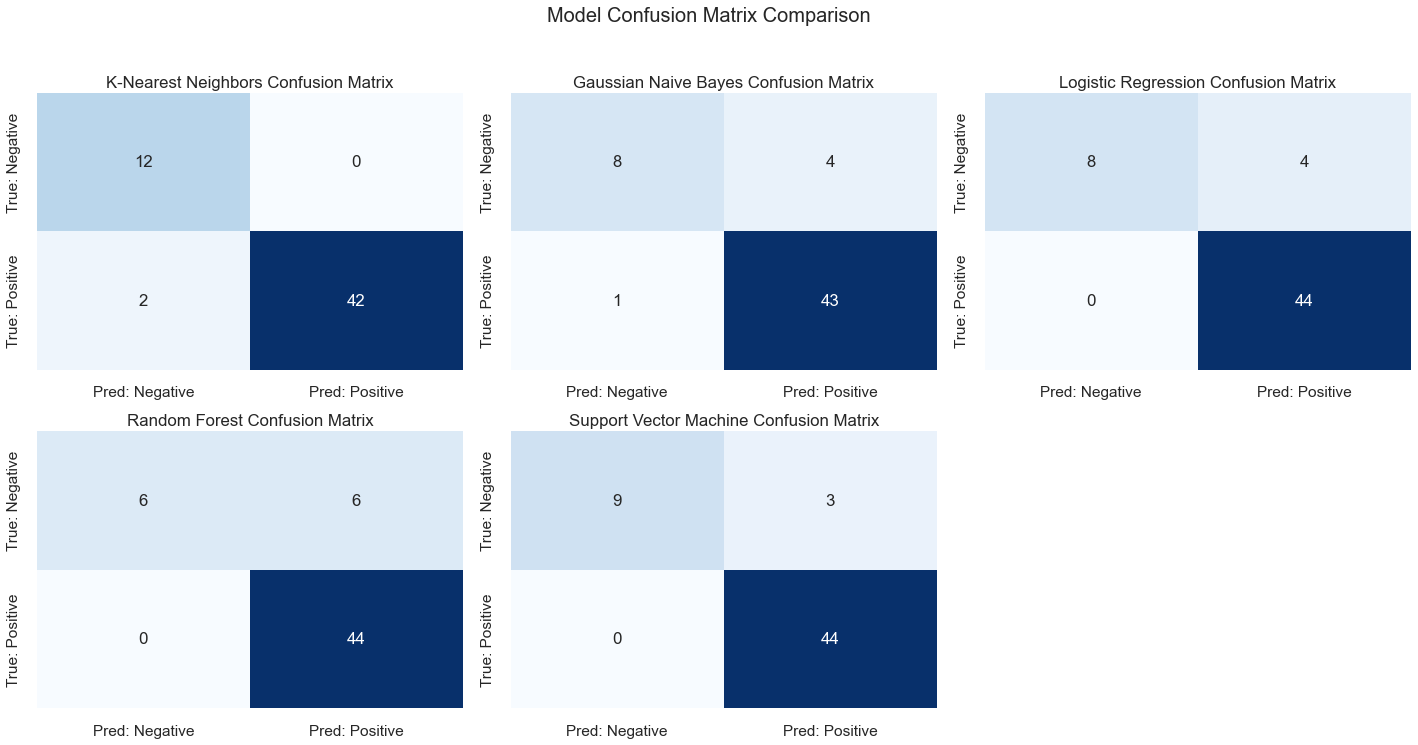

In [31]:
# ===============（2）模型性能对比混淆矩阵================
fig = plt.figure(figsize=(20, 15)) # 创建网格布局
gs = gridspec.GridSpec(3, 3) # 创建3x3的网格布局，用于组织多个子图

for i, (name, result) in enumerate(results.items()): # 绘制每个模型热图形式的混淆矩阵
    ax = fig.add_subplot(gs[i // 3, i % 3]) # 行索引i//3，列索引i%3（例如，i=4->(1, 1)）
    sns.heatmap(result["conf"], annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Pred: Negative', 'Pred: Positive'],
                yticklabels=['True: Negative', 'True: Positive'])
    ax.set_title(f"{name} Confusion Matrix")
    print("===i:===",i,"===name:===",name,"===result:===",result,"\r\n")

plt.tight_layout()
plt.subplots_adjust(top=0.9) # 即顶部保留10%空白
# 为整个图表添加总标题
plt.suptitle("Model Confusion Matrix Comparison", fontsize=20)
plt.show()

对比热图

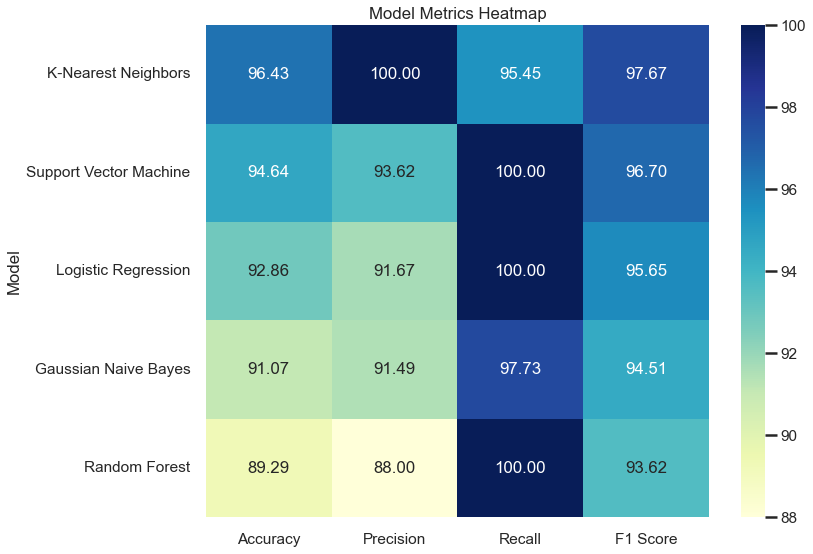

In [23]:
# ==============对比热图==============
plt.figure(figsize = (12, 8))
sns.heatmap(metric_df.set_index("Model"), annot=True, fmt=".2f", cmap="YlGnBu")
# metric_df
plt.title("Model Metrics Heatmap")
plt.tight_layout()
plt.show()

In [16]:
metric_df.set_index("Model")

,Accuracy,Precision,Recall,F1 Score
Model,,,,
K-Nearest Neighbors,96.43,100.00,95.45,97.67
Support Vector Machine,94.64,93.62,100.00,96.70
Logistic Regression,92.86,91.67,100.00,95.65
Gaussian Naive Bayes,91.07,91.49,97.73,94.51
Random Forest,89.29,88.00,100.00,93.62


In [17]:
metric_df

,Model,Accuracy,Precision,Recall,F1 Score
0,K-Nearest Neighbors,96.43,100.00,95.45,97.67
4,Support Vector Machine,94.64,93.62,100.00,96.70
2,Logistic Regression,92.86,91.67,100.00,95.65
1,Gaussian Naive Bayes,91.07,91.49,97.73,94.51
3,Random Forest,89.29,88.00,100.00,93.62
